In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<h1>Data Preprocessing</h1>

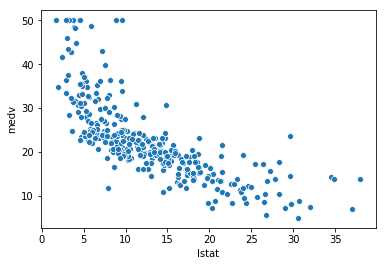

In [5]:
sns.scatterplot(data=df,x="lstat",y="medv")

<h1>Feature Scaling</h1>

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
for col in df:
    print (col)

ID
crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
black
lstat
medv


In [8]:
ss = StandardScaler()
for col in df:
    df[col] = ss.fit_transform(df[col].values.reshape(-1,1))
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-1.693014,-0.456875,0.322906,-1.285631,-0.25278,-0.166787,0.440154,-0.107736,0.192133,-0.98907,-0.664062,-1.465171,0.432990,-1.067772,0.134419
1,-1.686241,-0.454016,-0.472123,-0.604425,-0.25278,-0.767928,0.221060,0.379963,0.635528,-0.87451,-0.980620,-0.301616,0.432990,-0.478299,-0.127599
2,-1.672694,-0.453327,-0.472123,-1.304235,-0.25278,-0.863762,1.041952,-0.798347,1.189127,-0.75995,-1.097863,0.117264,0.406733,-1.356840,1.160655
3,-1.665921,-0.448330,-0.472123,-1.304235,-0.25278,-0.863762,1.253933,-0.499320,1.189127,-0.75995,-1.097863,0.117264,0.432990,-1.018177,1.466342
4,-1.652374,-0.445709,0.079980,-0.489936,-0.25278,-0.288758,-0.360821,-0.057898,0.935505,-0.53083,-0.576130,-1.511713,0.417953,-0.012106,0.014327


In [9]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-1.693014,-0.456875,0.322906,-1.285631,-0.25278,-0.166787,0.440154,-0.107736,0.192133,-0.98907,-0.664062,-1.465171,0.432990,-1.067772,0.134419
1,-1.686241,-0.454016,-0.472123,-0.604425,-0.25278,-0.767928,0.221060,0.379963,0.635528,-0.87451,-0.980620,-0.301616,0.432990,-0.478299,-0.127599
2,-1.672694,-0.453327,-0.472123,-1.304235,-0.25278,-0.863762,1.041952,-0.798347,1.189127,-0.75995,-1.097863,0.117264,0.406733,-1.356840,1.160655
3,-1.665921,-0.448330,-0.472123,-1.304235,-0.25278,-0.863762,1.253933,-0.499320,1.189127,-0.75995,-1.097863,0.117264,0.432990,-1.018177,1.466342
4,-1.652374,-0.445709,0.079980,-0.489936,-0.25278,-0.288758,-0.360821,-0.057898,0.935505,-0.53083,-0.576130,-1.511713,0.417953,-0.012106,0.014327


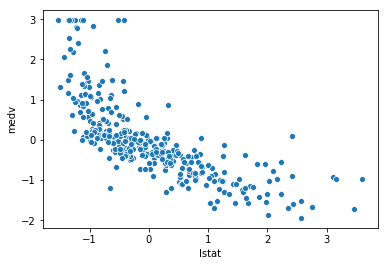

In [10]:
sns.scatterplot(x="lstat",y="medv",data=df)

<h1>Models</h1>

# Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
X = df[["lstat","rm","ptratio","indus","tax","nox"]]
y = df["medv"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Score: ",lr.score(X_test,y_test))
from sklearn.metrics import mean_squared_error as mse
print("Error: ",mse(lr.predict(X_test),y_test))

Score:  0.7078814945529877
Error:  0.31263886151747666


# Polynomial Regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
X = df[["lstat","rm","age","dis","ptratio","tax"]]
y = df["medv"]
pf = PolynomialFeatures(degree=2,interaction_only=False)
X_poly = pf.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.33,random_state=101)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Score",lr.score(X_test,y_test))
from sklearn.metrics import mean_squared_error as mse
print("Error: ",mse(lr.predict(X_test),y_test))

Score 0.9063015871923884
Error:  0.10028041551609222


# Random Forest Regressor

In [15]:
from sklearn.model_selection import train_test_split
X = df[["ptratio","tax","black","ID","rm","lstat","dis"]]
y = df["medv"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, min_samples_leaf=1,min_samples_split=2,random_state=101)
rfr.fit(X_train,y_train)
print("Score: ",rfr.score(X_test,y_test))
from sklearn.metrics import mean_squared_error as mse
print("Error: ",mse(rfr.predict(X_test),y_test))

Score:  0.9069553377855879
Error:  0.09958074111216668
